In [8]:
# importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
## Loading Train dataset
train=pd.read_csv("C:/Users/Surbhi/Desktop/Machine learning/Train.csv")

In [10]:
## Loading Test dataset
test=pd.read_csv("C:/Users/Surbhi/Desktop/Machine learning/Test.csv")

In [11]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
train.shape

(8523, 12)

In [14]:
test.shape

(5681, 11)

In [15]:
test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [18]:
## Consicing the Item_Fat_Content column, as values are repeating in different forms

train['Item_Fat_Content']=train['Item_Fat_Content'].apply(lambda x: x.replace('low fat','Low Fat'))
train['Item_Fat_Content']=train['Item_Fat_Content'].apply(lambda x: x.replace('LF','Low Fat'))
train['Item_Fat_Content']=train['Item_Fat_Content'].apply(lambda x: x.replace('reg','Regular'))

In [19]:
## Consicing the Item_Fat_Content column, as values are repeating in different forms

test['Item_Fat_Content']=test['Item_Fat_Content'].apply(lambda x: x.replace('low fat','Low Fat'))
test['Item_Fat_Content']=test['Item_Fat_Content'].apply(lambda x: x.replace('LF','Low Fat'))
test['Item_Fat_Content']=test['Item_Fat_Content'].apply(lambda x: x.replace('reg','Regular'))

In [20]:
# creating new column num_years
train['No. of years'] = train['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test['No. of years'] = test['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)

In [21]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,No. of years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [22]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,No. of years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,6
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,15
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,6
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28


C:\Users\Surbhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


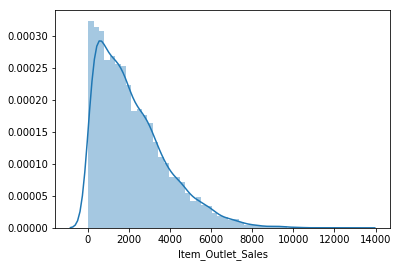

In [25]:
sns.distplot(train['Item_Outlet_Sales'])

In [26]:
train.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
No. of years                    9
dtype: int64

In [27]:
test.apply(lambda x : len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                2
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
No. of years                    9
dtype: int64

C:\Users\Surbhi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


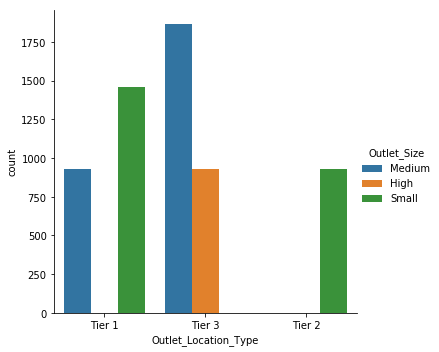

In [28]:
sns.factorplot('Outlet_Location_Type',data = train,hue ='Outlet_Size' ,kind='count')

C:\Users\Surbhi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


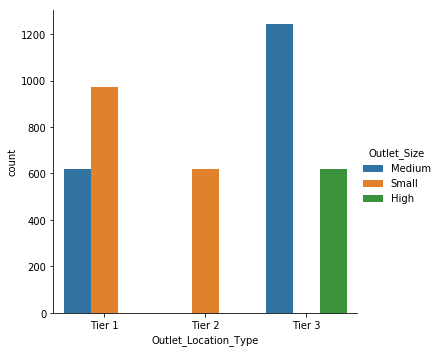

In [29]:
sns.factorplot('Outlet_Location_Type',data = test,hue ='Outlet_Size' ,kind='count')

In [30]:
data = [train, test]

In [31]:
# filling null values
for data in data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)

In [32]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,No. of years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,6
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28


In [33]:
# Handling Categorical columns by applying get dummies

col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [34]:
train_data = pd.get_dummies(train, columns = col, drop_first = True)
test_data = pd.get_dummies(test, columns = col,drop_first = True)

In [35]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,No. of years,Item_Fat_Content_Regular,Item_Type_Breads,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,14,0,0,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,4,1,0,...,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,14,0,0,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,15,1,0,...,0,0,0,1,0,0,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,26,0,0,...,0,0,0,0,0,0,1,1,0,0


In [46]:
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'No. of years',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [47]:
x= train_data[feat_cols]
y = train_data['Item_Outlet_Sales']

In [48]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

In [49]:
## Applying Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
## Model initialization
reg=LinearRegression()
reg=reg.fit(x_train,y_train)

In [51]:
y_pred = reg.predict(x_test)

In [52]:
y_pred

array([ 2458.96375526,  2537.68459598,  2245.80639585, ...,
        4263.6143873 , -1058.62657846,  5418.56893125])

In [53]:
import numpy as np
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE=",rmse)

RMSE= 1132.154574390424


In [56]:
# predicting on actual test data
actual = test_data[feat_cols]
y_result = reg.predict(actual)

In [57]:
y_result

array([1815.02913421, 1550.03990924, 1919.56810626, ..., 1837.32333838,
       3667.47797899, 1321.20829395])

In [58]:
#creating results .csv file
result = pd.DataFrame()
result['Item_Identifier'] = test_data['Item_Identifier']
result['Outlet_Identifier'] = test_data['Outlet_Identifier']

result["Item_Outlet_Sales"] = y_result
result = result.sort_index()
result.to_csv('Bigmart_sales.csv',index = False)